In [8]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import data
data = "../2019 Winter Data Science Intern Challenge Data Set.csv"
orders_df = pd.read_csv(data)
orders_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
3,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00


In [4]:
orders_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


## 1. 

In [5]:
# calculate cost per item to determine if some items are mis-priced
orders_df['item_cost'] = orders_df['order_amount']/orders_df['total_items']
orders_df['item_cost']

0       352.0
1       352.0
2       352.0
3       352.0
4       352.0
        ...  
4995    178.0
4996    136.0
4997    173.0
4998    149.0
4999    136.0
Name: item_cost, Length: 5000, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x230892e3280>,
 'caps': [<matplotlib.lines.Line2D at 0x230892e39a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2308c442e80>],
 'medians': [<matplotlib.lines.Line2D at 0x230892ed100>],
 'fliers': [<matplotlib.lines.Line2D at 0x230892ed490>],
 'means': []}

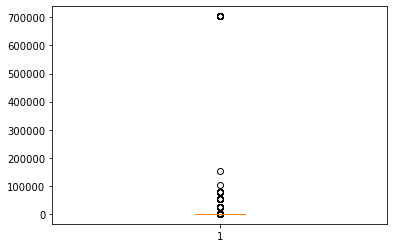

In [10]:
plt.boxplot(orders_df['order_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2308933fb80>,
 'caps': [<matplotlib.lines.Line2D at 0x2308934c2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2308933f7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2308934ca00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2308934cd90>],
 'means': []}

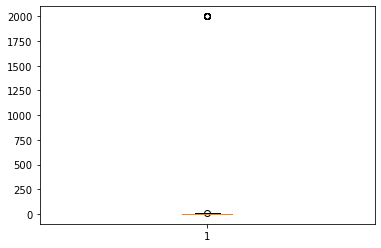

In [11]:
plt.boxplot(orders_df['total_items'])

In [17]:
dropped_outliers_df = orders_df[orders_df['total_items']<2000]
dropped_outliers_df.describe()

,order_id,shop_id,user_id,order_amount,total_items,item_cost
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.00000,4983.00000
mean,2501.060405,50.106362,849.918322,754.091913,1.99398,387.86474
std,1443.090253,29.051718,86.800308,5314.092293,0.98318,2446.12562
min,1.000000,1.000000,700.000000,90.000000,1.00000,90.00000
25%,1250.500000,24.000000,776.000000,163.000000,1.00000,133.00000
50%,2502.000000,50.000000,850.000000,284.000000,2.00000,153.00000
75%,3750.500000,75.000000,925.000000,390.000000,3.00000,168.00000
max,5000.000000,100.000000,999.000000,154350.000000,8.00000,25725.00000


In [25]:
# define quartiles and interquartile range for item cost
q3 = dropped_outliers_df.describe().loc['75%','item_cost']
q1 = dropped_outliers_df.describe().loc['25%','item_cost']
iq = q3 - q1
# upper fence
uf = q3 + 1.5*iq
uf

220.5

In [27]:
dropped_outliers_df2 = dropped_outliers_df[dropped_outliers_df['item_cost']<uf]
dropped_outliers_df2.describe()

,order_id,shop_id,user_id,order_amount,total_items,item_cost
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717,150.400163
std,1444.221163,29.154367,86.887947,155.941112,0.982602,23.851202
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000,132.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000


In [36]:
# Calculate metrics by store
store_sales_df = dropped_outliers_df2.groupby('shop_id').agg({'order_id': 'count','order_amount':'sum','total_items':'count'})
store_sales_df

,order_id,order_amount,total_items
shop_id,,,
1,44,13588,44
2,55,9588,55
3,48,14652,48
4,51,13184,51
5,45,13064,45
...,...,...,...
96,51,16830,51
97,48,15552,48
98,58,14231,58
